## Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matching_functions import *
import random

plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'

# seed optional
seed = 593724313
# seed = 736592580
# seed = 810204671
random.seed(seed)
np.random.seed(seed)

Dyck: 57.346096, Greedy: 51.630168, Best hybrid (k=900): 50.893858


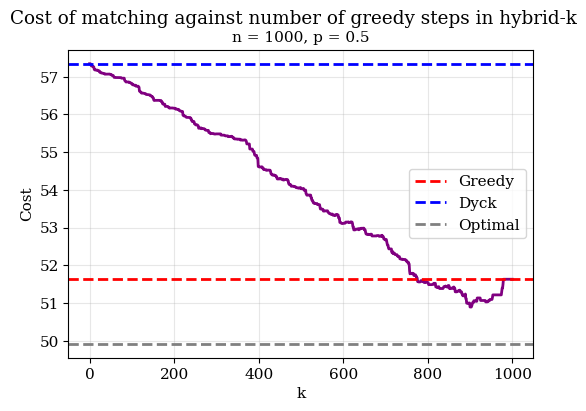

In [ ]:
# This code generates points then computes and plots the cost of the matchings under hybrid k for all k from 0 to n

n = 2000
p = 0.5
k_values = list(range(n + 1))
X, Y = generate_random_points(n)
optimal, optimal_cost = compute_optimal(X, Y, p)

hybrid_costs = compute_hybrid_costs_for_all_k(X, Y, p)
dyck_cost = hybrid_costs[0]
greedy_cost = hybrid_costs[-1]
min_k = hybrid_costs.index(min(hybrid_costs))

print(f"Dyck: {dyck_cost:.6f}, Greedy: {greedy_cost:.6f}, Best hybrid (k={min_k}): {hybrid_costs[min_k]:.6f}")
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_values, hybrid_costs, '-', linewidth=2, markersize=4, color='purple')
ax.axhline(greedy_cost, color='red', linestyle='--', linewidth=2, label='Greedy')
ax.axhline(dyck_cost, color='blue', linestyle='--', linewidth=2, label='Dyck')
ax.axhline(optimal_cost, color='grey', linestyle='--', linewidth=2, label='Optimal')
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('Cost')
plt.suptitle('Cost of matching against number of greedy steps in hybrid-k')
plt.title(f"n = {n}, p = {p}", fontsize=11)
ax.grid(True, alpha=0.3)
plt.show()

Dyck: 1.000000, Greedy: 0.230243, Best hybrid (k=900): 0.131085


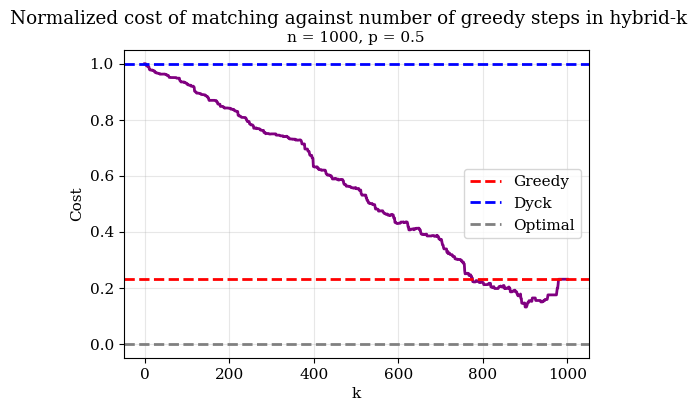

In [7]:
# This code plots the same thing as above but normalized between 0 and 1

max_pure_translated = max(dyck_cost, greedy_cost) - optimal_cost
normalized_hybrid_costs = [(c - optimal_cost)/max_pure_translated for c in hybrid_costs]
normalized_dyck_cost = normalized_hybrid_costs[0]
normalized_greedy_cost = normalized_hybrid_costs[-1]
normalized_optimal_cost = 0

print(f"Dyck: {normalized_dyck_cost:.6f}, Greedy: {normalized_greedy_cost:.6f}, Best hybrid (k={min_k}): {normalized_hybrid_costs[min_k]:.6f}")
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_values, normalized_hybrid_costs, '-', linewidth=2, markersize=4, color='purple')
ax.axhline(normalized_greedy_cost, color='red', linestyle='--', linewidth=2, label='Greedy')
ax.axhline(normalized_dyck_cost, color='blue', linestyle='--', linewidth=2, label='Dyck')
ax.axhline(normalized_optimal_cost, color='grey', linestyle='--', linewidth=2, label='Optimal')
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('Cost')
plt.suptitle('Normalized cost of matching against number of greedy steps in hybrid-k')
plt.title(f"n = {n}, p = {p}", fontsize=11)
ax.grid(True, alpha=0.3)
plt.show()

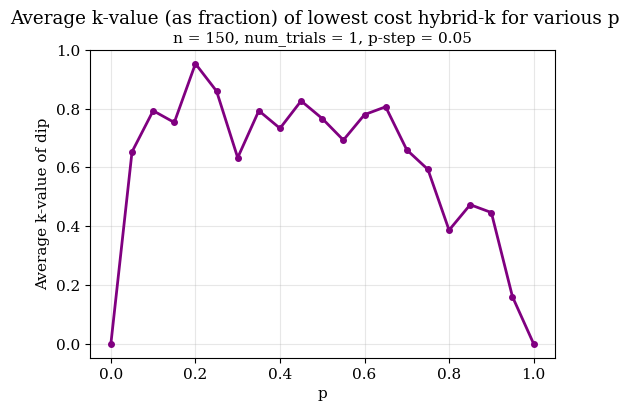

In [4]:
# Generate n points num_trial number of times for various p. Compute the average k which has the lowest cost matching for each p and plot k against p 

n = 150
num_trials = 1
step = 0.05
p_vals = np.arange(0, 1 + step, step)

avg_dips = []
for p in p_vals:
  dip_sum = 0
  for _ in range(num_trials): 
      X, Y = generate_random_points(n)
      hybrid_costs = compute_hybrid_costs_for_all_k(X, Y, p)
      dip_sum += hybrid_costs.index(min(hybrid_costs))
  avg_dips.append(dip_sum / (n * num_trials))
      
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(p_vals, avg_dips, 'o-', linewidth=2, markersize=4, color='purple')
ax.set_xlabel('p')
ax.set_ylabel('Average k-value of dip')
plt.suptitle('Average k-value (as fraction) of lowest cost hybrid-k for various p')
plt.title(f"n = {n}, num_trials = {num_trials}, p-step = {step}", fontsize=11)
ax.grid(True, alpha=0.3)
plt.show()

# print(f"Greedy: {greedy_cost:.6f}, Dyck: {dyck_cost:.6f}, Best hybrid (k={min_k}): {hybrid_costs[min_k]:.6f}")

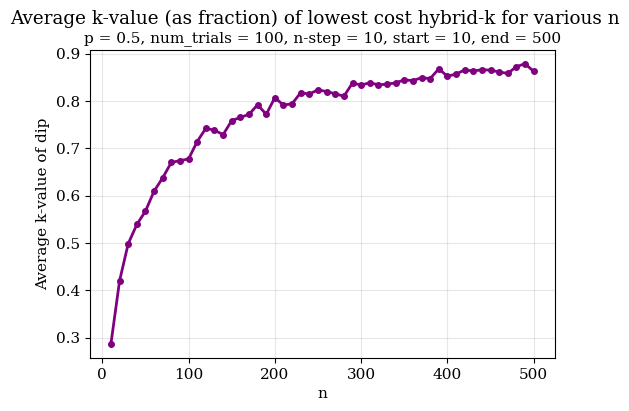

In [5]:
# Generate n points num_trials number of times for various n. Compute the average k which has the lowest cost matching for each n and plot k against n

p = 0.5
num_trials = 100
step = 10
start_n = 10
max_n = 500
n_vals = np.arange(start_n, max_n + step, step)

avg_dips = []
for n in n_vals:
  dip_sum = 0
  for _ in range(num_trials): 
      X, Y = generate_random_points(n)
      hybrid_costs = compute_hybrid_costs_for_all_k(X, Y, p)
      dip_sum += hybrid_costs.index(min(hybrid_costs))
  avg_dips.append(dip_sum / (n * num_trials))
      
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_vals, avg_dips, 'o-', linewidth=2, markersize=4, color='purple')
ax.set_xlabel('n')
ax.set_ylabel('Average k-value of dip')
plt.suptitle('Average k-value (as fraction) of lowest cost hybrid-k for various n')
plt.title(f"p = {p}, num_trials = {num_trials}, n-step = {step}, start = {start_n}, end = {max_n}", fontsize=11)
ax.grid(True, alpha=0.3)
plt.show()